# Creating Animation Plot By Using Matplotlib in Jupyter Notebook

In this exercise, we are going to plot an animation graphic by using Matplotlib through Jupyter Notebook. Before we start, we have to install `ffmpeg` in our operating system. The `ffmpeg` can be installed through terminal or package source. The package source can be downloaded on `https://ffmpeg.org/download.html`. Just click on a icon to download the `ffmpeg` based on your operating system. Follow the instruction bellow to install the `ffmpeg`.

## 1. Ubuntu

- Open terminal (ctrl +T).
- Type `sudo apt-get install ffmpeg` and hit enter.
- Waiting the installation process
 

## 2. Mac OS

- Open terminal
- type `brew install ffmpeg`
- Waiting the installation process

## 3. Windows

- Download the ffmpeg package from `https://ffmpeg.org/download.html`
- Extract the file and rename the folder name to `FFmpeg`
- Move the `FFmpeg` folder to C: directory
- Click windows icon + S and type `Edit the system environtment variables`, the hit enter
- Click `Environments variables`
- Edit `path` variable on `User variable for [USER NAME]` box
- Click `New` and type `C:\FFmpeg\bin`, then click `OK`
- Then click `OK` again
- Type the `ffmpeg -version` in command prompt and hit enter. The result will shows
    
    ```
    ffmpeg version 2021-06-16-git-604924a069-full_build-www.gyan.dev Copyright (c) 2000-2021 the FFmpeg developers
    built with gcc 10.3.0 (Rev2, Built by MSYS2 project)
    ...
    ...
    ```
    
Let's get started

We import the following libraries

In [2]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import numpy as np

In this exercise, we use vertical projectile motion equation 

`y = y0 + v0y t + 0.5 g t^2`

to plot a simple graph. We set the time length to 60 sec by time step is 0.1 sec and started from 0 sec. This values are assigned to each variable names as follows

In [3]:
mint = 0 # in seconds
maxt = 60 # in seconds
stept = 0.1 # in seconds
t = np.arange(mint,maxt,stept)

We then set the initial position in y-axis is 0 and initial velocity is 10 m/s. We use the default of gravity acceleration of 9.8 m/s^2.

In [5]:
y0 = 0 # m
v0 = 10 # m/s
g = 9.8 # m/s^2

Next, we calculate the vertical projectile motion as follows

In [7]:
y = y0 + (v0 * t) + (0.5 * g * t**2)

We can apply simple plot as follows

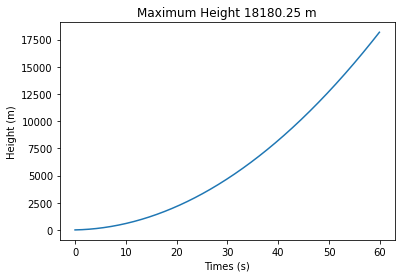

In [105]:
plt.figure(1)
plt.plot(t,y)
plt.xlabel('Times (s)')
plt.ylabel('Height (m)')
plt.title('Maximum Height %.2f m' % max(y))
plt.show()

Next, we create an animation of the graph above by the following steps. First, we create the empty canvas for initial animation plot of the graph

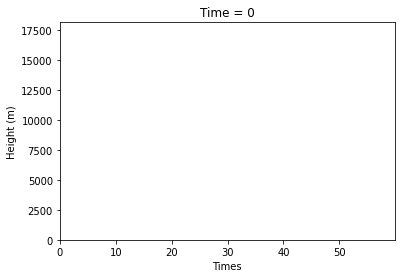

In [11]:
fig2,ax2 = plt.subplots()
ax2.set_xlabel('Times')
ax2.set_ylabel('Height (m)')
ax2.set_xlim(min(t), max(t))
ax2.set_ylim(min(y), max(y))
t_title = ax2.set_title('Frame = 0')
line, = ax2.plot([], [], 'b', lw=2)

We then create an initial empty animation function and animation function as follows 

In [29]:
def init():
    line.set_data([], [])
    return (line,)

def drawanimation(i):
    t_title.set_text('Frame = {0:4}'.format(i))
    line.set_data(t[:i],y[:i])
    return (line,)

anim = animation.FuncAnimation(fig2, drawanimation, init_func=init, frames=len(t), repeat=False, interval=20)

To show the animation in jupyter notebook, type the following code

In [30]:
HTML(anim.to_html5_video())